Probability of HEVR-5 Failure before 450 runs: 63.8 %
Reliability Estimate at 450 runs: 36.2 %


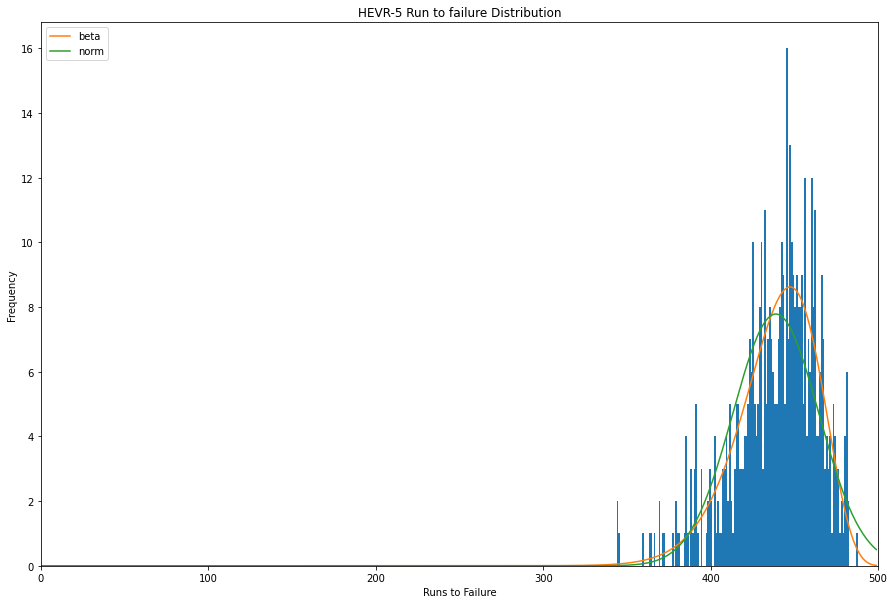

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import scipy
import scipy.stats
import warnings
import numpy
warnings.filterwarnings("ignore")

# For the example we will generate 500 random points to generate a right tailed distribution curve 

# Sample size

size = 500
x = numpy.arange(size)

#Generate data

y = scipy.stats.beta.rvs(35, 5, size=size, random_state=30)*500

#Histogram

plt.figure(figsize=(15,10))
h = plt.hist(y, bins=range(500))

#Distributions

dist_names = ['beta', 'norm']
for dist_names in dist_names:
    dist = getattr(scipy.stats, dist_names)
    param = dist.fit(y)
    pdf_fitted = dist.pdf(x, *param[:-2], loc=param[-2], scale=param[-1])*size
    plt.plot(pdf_fitted, label=dist_names)
    plt.xlim(0,500)

plt.legend(loc='upper left')
plt.title("HEVR-5 Run to failure Distribution")
plt.xlabel("Runs to Failure")
plt.ylabel("Frequency")
plt.show()

# Probability of HEVR-5 Failure

dist = getattr(scipy.stats, 'beta')
param = dist.fit(y)
args = param[:-2]
loc = param[-2]
scale = param[-1]

print("Probability of HEVR-5 Failure before 450 runs:", round(scipy.stats.beta.cdf(450, *args, loc=loc, scale=scale)*100,2),"%")

print("Reliability Estimate at 450 runs:", round(scipy.stats.beta.sf(450, *args, loc=loc, scale=scale)*100,2),"%")